<center>
    <h1>Kickstarter Exploratory Data Analysis and Success Prediction</h1>
    <h2>Data Science CS-481</h2>
</center>

## What is Kickstarter?
Kickstarter is a crowdfunding platform where people can post their ideas and allow people to publicly fund their project. The company's stated mission is to <i>"help bring creative projects to life"</i>. Developers and designers who have creative and useful ideas but not the financial support needed to bring them to fruition can use Kickstarter to allow potential users to provide the necessary funds by donations ranging from smaller numbers like \$5 to even larger ones like $1000. Some important terms and their definitions, as provided by Kickstarter, are listed below,

- __Project:__ A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
- __Funding Goal:__ The funding goal is the amount of money that a creator needs to complete their project.
- __Deadline:__ All projects have a deadline, i.e., a date by which the funding goal must be met otherwise the project is deemed a failure.
- __Backer:__ Backers are folks who pledge money towards a project.
- __Pledge:__ A pledge is a donation a backer makes towards a project.

Not all Kickstarter projects are successful. Some fail to reach their targets and all the backers are refunded their amount. Funding on Kickstarter is all-or-nothing. A project only receives the pledged amount if it reaches its target goal.
    
## Abstract
Kickstarter metrics provide a wealth of information that can be used for exploration in the field of data science. Predicting whether a Kickstarter project will be successful at an early stage is an interesting problem. This report aims to assess the various metrics and data that can be collected from Kickstarter's platform and, finally, use the important information to make predictions regarding a Kickstarter project's success or failure. Several classifier methods are used to either classify a project as either success or fail.

## Data set
The data set used in this report is the [Kickstarter Projects](https://www.kaggle.com/kemical/kickstarter-projects) data set on Kaggle by user [Kemical](https://www.kaggle.com/kemical), though the information is readily available on Kickstarter and can be directly scraped from their website as well.

## Exploratory Data Analysis
The information above is sufficient for the reader to completely understand the analysis of the data below. The following section of the report provides a detailed, in-depth exploration of the data set. The analysis is performed in the Python language.

Importing the required libraries.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from dateutil.parser import parse as parse_date
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data Integrity

It is important to check how consistent the data is, what values are missing, and what the fields actually represent. This section analyzes the information that exists in the data set.<br>The data set is provided in the form of a CSV (comma separated values) file and can be read using the pandas library in the form of a dataframe.

In [2]:
df = pd.read_csv('ks-projects-201801.csv')

Let's take a look at the top rows of the data to see what we're dealing with here.

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


- <font color=red>__id__:</font> An identifier for the row.
- <font color=red>__name__:</font> The name of the project.
- <font color=red>__category__:</font> The sub-category of the project.
- <font color=red>__main_category__:</font> The major category of the project.
- <font color=red>__currency__:</font> The currency the project is to funded in.
- <font color=red>__deadline__:</font> The deadline for the project.
- <font color=red>__goal__:</font> The funding goal of the project.
- <font color=red>__launched__:</font> The date the project was launched on.
- <font color=red>__pledged__:</font> The amount already pledged for the project.
- <font color=red>__state__:</font> The current status of the project.
- <font color=red>__backers__:</font> The number of people backing (pledged an amount to) the project.
- <font color=red>__country__:</font> The country the project is based in.
- <font color=red>__usd pledged__:</font> The amount already pledged for the project in United States dollars.
- <font color=red>__usd_pledged_real__:</font> The author of the data set describes this as the amount pledged for the project in United States dollars using a reliable and updated currency converter.
- <font color=red>__usd_goal_real__:</font> The author of the data set describes this as the funding goal of the project in United States dollars using a reliable and updated currency converter.

Statistical information regarding the numeric columns is a good start to make observations regarding the nature of the data. The pandas `describe()` method can be used to obtain this information.

In [4]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


All rows except for <font color=red>__usd pledged__</font> have a consistent count. This means that that column has some missing values. The rows with missing values can help indicate how to proceed with this.

In [5]:
# look for rows where 'usd pledged' has a null value
null_valued_rows = df.loc[df['usd pledged'].isnull()]

# print the number of rows with null values
print(len(null_valued_rows))

null_valued_rows.head()

3797


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


Exactly 3797 rows have missing values for that column. An interesting feature in these rows is the value for <font color=red>__country__</font> column. `N,0"` doesn't seem to be a proper country name. Let's see how it compares to the other values for this column.

In [6]:
df['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

Interestingly enough, the number of entries for column <font color=red>__country__</font> valued `N,0"` is exactly the same as the number of rows for which that value is missing. That means each row corresponding to that country does not have a value for <font color=red>__usd pledged__</font>. Our next step should be to figure out what country this is. Another field that can provide some incentive is <font color=red>__currency__</font>. We can check the currencies prevalent in this country and guess what country it actually is.

In [7]:
df.loc[df['country'] == 'N,0"']['currency'].value_counts()

USD    2738
GBP     460
CAD     206
EUR     186
AUD     111
SEK      31
NZD      28
DKK      16
NOK      14
CHF       7
Name: currency, dtype: int64

Information from the currency gives no clear indication about the country as `USD` is prevalent due to its wide and common use.

We have two choices here; either remove the entries corresponding to `N,0"` or remove the <font color=red>__usd pledged__</font> column. Another option would be to impute the values for those columns but we have no information regarding that country, which makes any prediction unrealistic. Another important factor to consider is the dominant status of the projects for that country.

In [8]:
df.loc[df['country'] == 'N,0"']['state'].value_counts()

undefined     3562
failed         105
successful     105
canceled        22
suspended        2
live             1
Name: state, dtype: int64

Most of the projects from this country have `undefined` states. Moreover, `failed` and `successful` are equal in number. It would be wise to drop this country as its questionable statistics do not bode well for the model we intend on training.

In [9]:
df = df[df['country'] != 'N,0"']

In [10]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748640e+05,3.748640e+05,3.748640e+05,374864.000000,3.748640e+05,3.748640e+05,3.748640e+05
mean,1.074651e+09,4.952310e+04,9.750436e+03,106.687276,7.036729e+03,9.120803e+03,4.586318e+04
std,6.191357e+08,1.189355e+06,9.601043e+04,911.705321,7.863975e+04,9.131921e+04,1.158761e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380708e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075277e+09,5.500000e+03,6.200000e+02,12.000000,3.947200e+02,6.244100e+02,5.500000e+03
75%,1.610137e+09,1.650000e+04,4.080000e+03,57.000000,3.034090e+03,4.050815e+03,1.600000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


There, now the counts are consistent.

It is wise to know what the various values for the alphabetic columns are, especially the <font color=red>__state__</font> column.

In [11]:
df['state'].value_counts()

failed        197614
successful    133851
canceled       38757
live            2798
suspended       1844
Name: state, dtype: int64

Thus, a project could have any of the five statuses; `failed`, `successful`, `canceled`, `undefined`, `live`, and `suspended`. The ratio between them can be seen in the pie chart below.

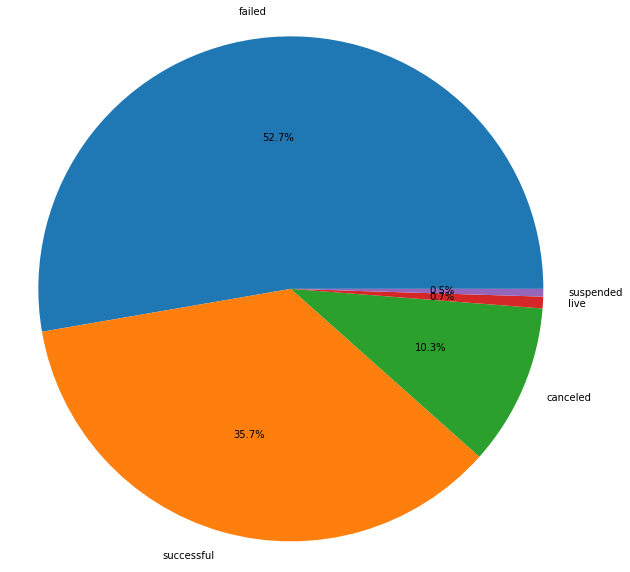

In [12]:
plt.figure(figsize=(10, 10))

# provide counts for values and their keys as data and labels respectively
plt.pie(x=df['state'].value_counts(), labels=df['state'].value_counts().keys(), autopct='%.1f%%')

# make the aspect ratio 1:1
plt.axis('equal')
plt.show()

According to this data set, more than 50% of the projects on Kickstarter fail. Only 35% succeed while the rest are either cancelled or suspended.

However, we're not interested in the entries for statuses other than `failed` or `successful` since we intend on training a binary predictor. The other entries also do not provide meaningful information. Thus, we can settle with dropping these entries.

In [13]:
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')]

We should also remove the outliers from the data set. Projects with extremely high goals can skew our data and should be removed. From this point onwards, we consider only the interquartile range of `25%` to `75%` for our analysis.

In [14]:
q1 = df['goal'].quantile(0.25)
q3 = df['goal'].quantile(0.75)
iqr = q3 - q1
df = df.query('(@q1 - 1.5 * @iqr) <= goal <= (@q3 + 1.5 * @iqr)')

The same goes for backers.

In [15]:
q1 = df['backers'].quantile(0.25)
q3 = df['backers'].quantile(0.75)
iqr = q3 - q1
df = df.query('(@q1 - 1.5 * @iqr) <= backers <= (@q3 + 1.5 * @iqr)')

For our last step, we'll drop the columns that are unnecessary for the analysis below.

In [16]:
df = df.drop(columns=['usd_pledged_real', 'usd_goal_real', 'name'])

## Data Trends
The following section analyzes trends in the data set and discusses the various metrics that can be used to analyze the data itself. Note that from this point onwards, the term _data-set_ refers to the narrowed version we obtained after filtering the data in the previous section.

### Status of projects
We've already narrowed our data set down to either two states, `successful` or `failed`. The following pie-chart shows the ratio between these two states in the narrowed-down data set.

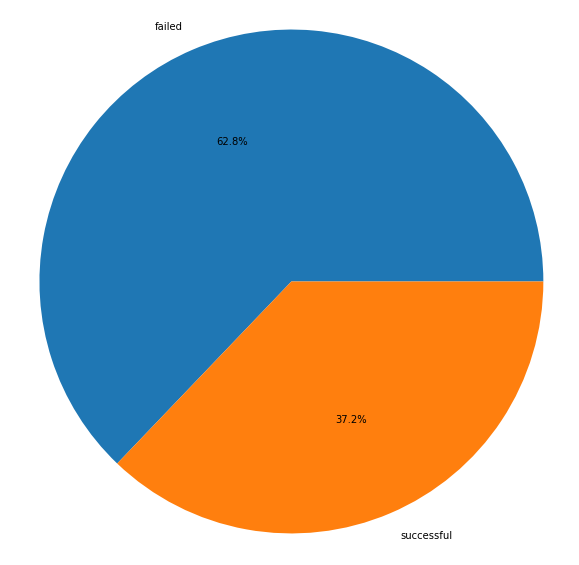

In [17]:
plt.figure(figsize=(10, 10))

# provide counts for values and their keys as data and labels respectively
plt.pie(x=df['state'].value_counts(), labels=df['state'].value_counts().keys(), autopct='%.1f%%')

# make the aspect ratio 1:1
plt.axis('equal')
plt.show()

60% of the remaining projects are failures while the other 50% are successful ones.

### Analysis function
A major trend we're interested in is the success/fail ratio respective to a column. Below we define a generic method that analyzes that ratio and presents a neat, stacked bar-chart of the ratio. We'll use this method to perform generic analysis on different columns.

In [18]:
def columnwiseSuccessRateAnalysis(df, column):
    success_data = []
    fail_data = []

    # calculate the success/fail percentages
    for i in df[column].unique():
        categorized = df.loc[df[column] == i]
        failed = categorized.state.value_counts()['failed']
        successful = categorized.state.value_counts()['successful']
        total = failed + successful
        success_data.append(successful / total * 100)
        fail_data.append(failed / total * 100)

    unique = df[column].unique()
    count = len(unique)
    
    width = 0.35
    x = np.arange(count)
    _y = np.arange(0, 101, 10)
    
    plt.figure(figsize=(20, 10))
    
    # plot a stacked bar chart
    s = plt.bar(x, success_data, width)
    f = plt.bar(x + width, fail_data, width)
    plt.legend((s,f), ('Successful', 'Failed'))
    plt.xticks(x, unique, rotation='vertical')
    plt.gca().set_xticks(x + width / 2)
    
    for i in range(len(x)):
        plt.annotate('%.1f%%' % success_data[i], xy=[x[i] - width, success_data[i]])
        plt.annotate('%.1f%%' % fail_data[i], xy=[x[i], fail_data[i]])
        
    
    plt.show()
    
       
    max_index = success_data.index(max(success_data))
    min_index = success_data.index(min(success_data))

    print("\nMost successes: %s at %.1f%% success rate" % (unique[max_index], success_data[max_index]))
    print("Most failures: %s at %.1f%% success rate" % (unique[min_index], success_data[min_index]))

### Location
Another important metric is the location of the project. The success of a project can vary from country to country. First, let's see how the country wide division is among the projects.

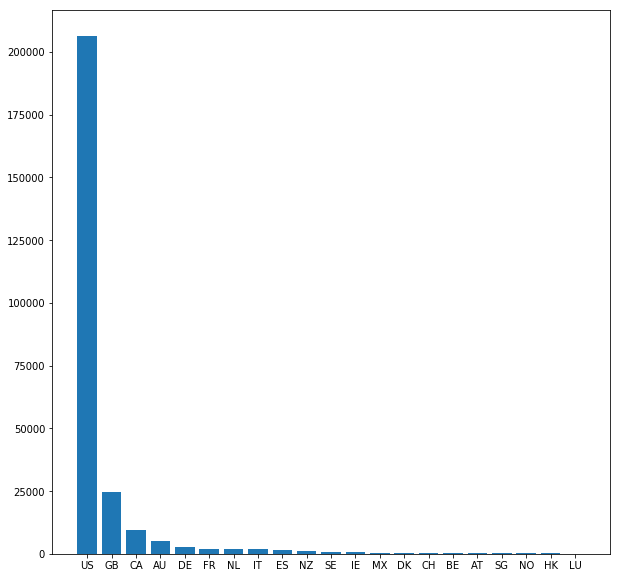

In [19]:
plt.figure(figsize=(10, 10))
count = len(df['country'].value_counts())
plt.bar(np.arange(count), df['country'].value_counts())
plt.xticks(np.arange(count), df['country'].value_counts().keys())
plt.show()

The number of projects based in the United States far outweighs the remainder of the projects but that does not mean that it has the best success/fail ratio. Using our method from before, we can analyze the ratio respective to the column <font color=red>__country__</font>.

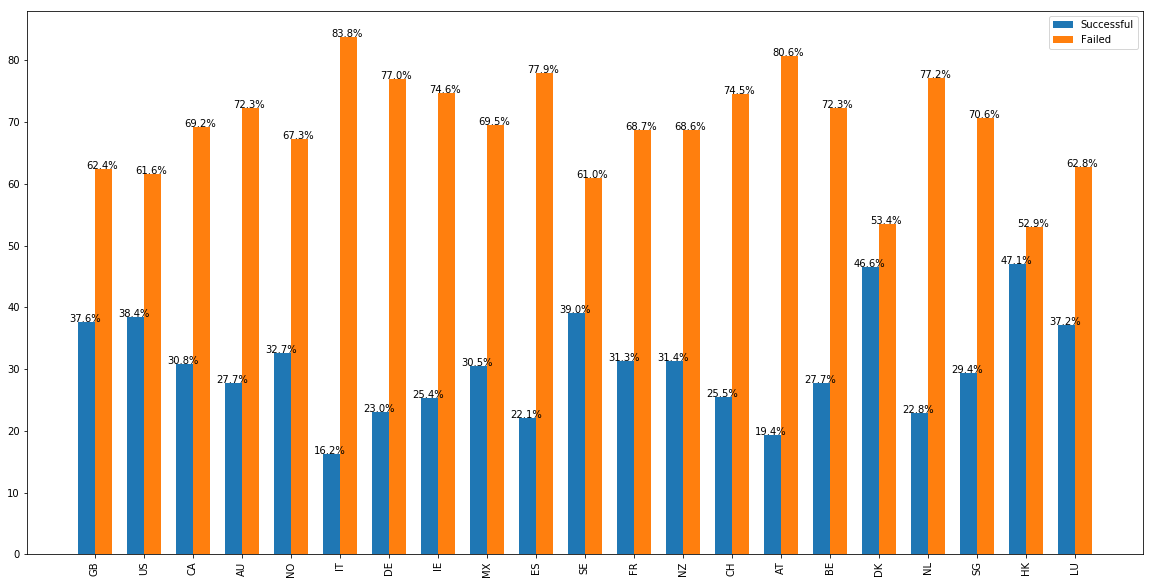


Most successes: HK at 47.1% success rate
Most failures: IT at 16.2% success rate


In [20]:
columnwiseSuccessRateAnalysis(df, 'country')

From this analysis, we can see that Hong Kong `HK` has the best success rate at `45.28%` and Italy `IT` has the worst success rate with only `18.53%` of projects succeeding.

### Currency
The various currencies used on Kickstarter and their frequencies in the data set are as follows,

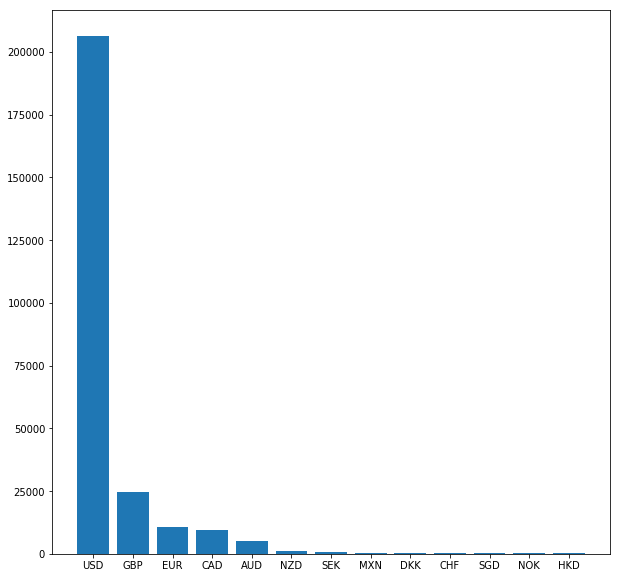

In [21]:
plt.figure(figsize=(10, 10))
count = len(df['currency'].value_counts())
plt.bar(np.arange(count), df['currency'].value_counts())
plt.xticks(np.arange(count), df['currency'].value_counts().keys())
plt.show()

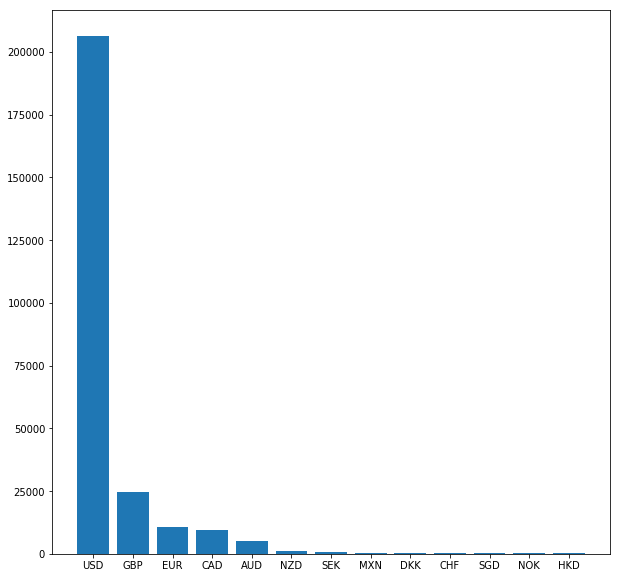

In [22]:
plt.figure(figsize=(10,10))
count = len(df.currency.value_counts())
plt.bar(np.arange(count), df.currency.value_counts())
plt.xticks(np.arange(count), df.currency.value_counts().keys())
plt.show()

Same as it was with <font color=red>__country__</font>, the dominating currency is `USD`.

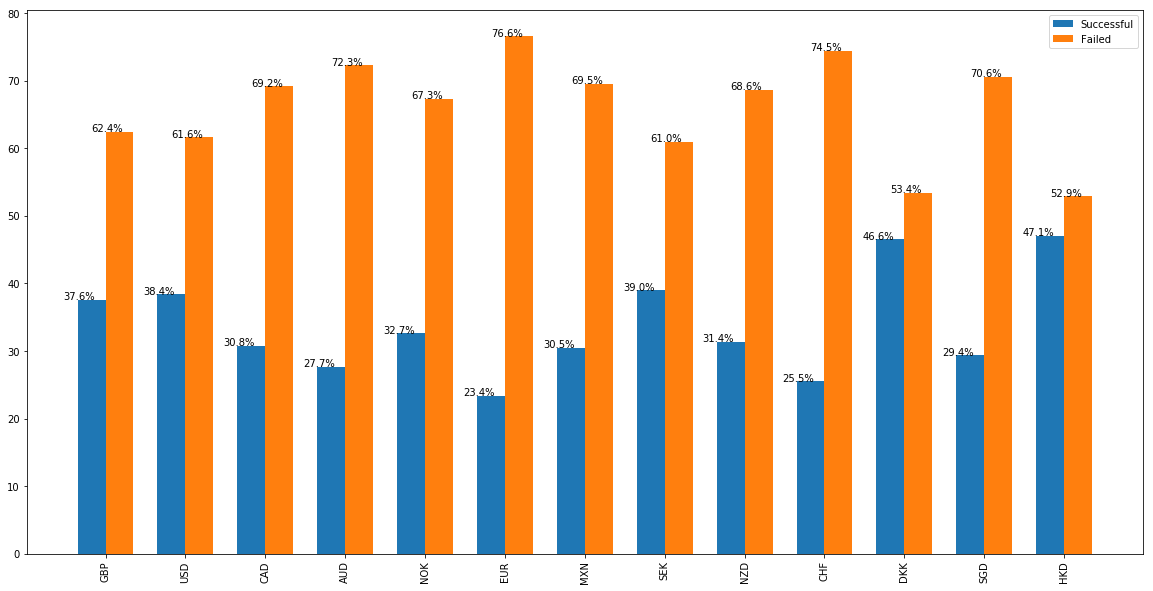


Most successes: HKD at 47.1% success rate
Most failures: EUR at 23.4% success rate


In [23]:
columnwiseSuccessRateAnalysis(df, 'currency')

Consistent with the prior results, Hong Kong Dollar `HKD` has the most successes and the Euro `EUR` with most failures.

### Categories
The <font color=red>__category__</font> field specifies which specific category the item belongs to. The following are the categories in the data set.

In [24]:
df['category'].value_counts()

Product Design       10848
Shorts               10725
Music                10565
Documentary          10274
Food                  8003
Fiction               7518
Art                   6645
Film & Video          6619
Fashion               6438
Nonfiction            6417
Theater               6113
Tabletop Games        6051
Video Games           5753
Rock                  5753
Children's Books      5504
Apparel               5240
Indie Rock            4857
Photography           4796
Webseries             4365
Publishing            4129
Crafts                3793
Country & Folk        3684
Comics                3573
Apps                  3493
Narrative Film        3268
Web                   3195
Hip-Hop               3195
Technology            3129
Painting              2853
Pop                   2689
                     ...  
Printing               179
Stationery             173
Space Exploration      172
Civic Design           168
Camera Equipment       162
Video Art              156
B

The data set contains a staggering 159 specific categories. These categories are far too many and far too detailed to be useful for our analysis. Luckily, another field <font color=red>__main_category__</font> contains fewer values and generalizes the data set much better. We can, therefore, drop this column altogether.

In [25]:
df = df.drop('category', axis=1)

In [26]:
print(df['main_category'].value_counts())
print("\nTotal categories:", len(df['main_category'].unique()))

Film & Video    44564
Music           40556
Publishing      30677
Art             23007
Games           17126
Fashion         16629
Food            16274
Design          15719
Technology      15542
Theater          9262
Photography      8648
Comics           7499
Crafts           7159
Journalism       3451
Dance            3309
Name: main_category, dtype: int64

Total categories: 15


We can now analyze the data set corresponding to these fewer major categories. The following pie chart depicts which percentage of the data belongs to which category.

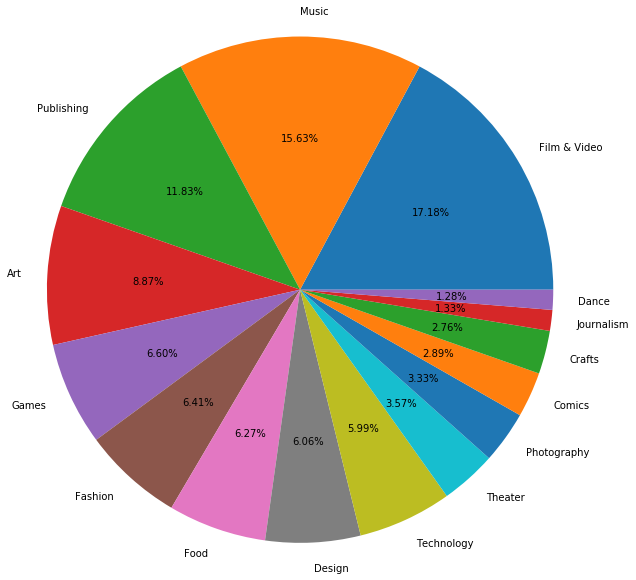

In [27]:
plt.figure(figsize=(10, 10))
plt.pie(x=df['main_category'].value_counts(), labels=df['main_category'].value_counts().keys(), autopct='%.2f%%')
plt.axis('equal')
plt.show()

We can use our previously defined method to analyze the success/fail ratio on this field.

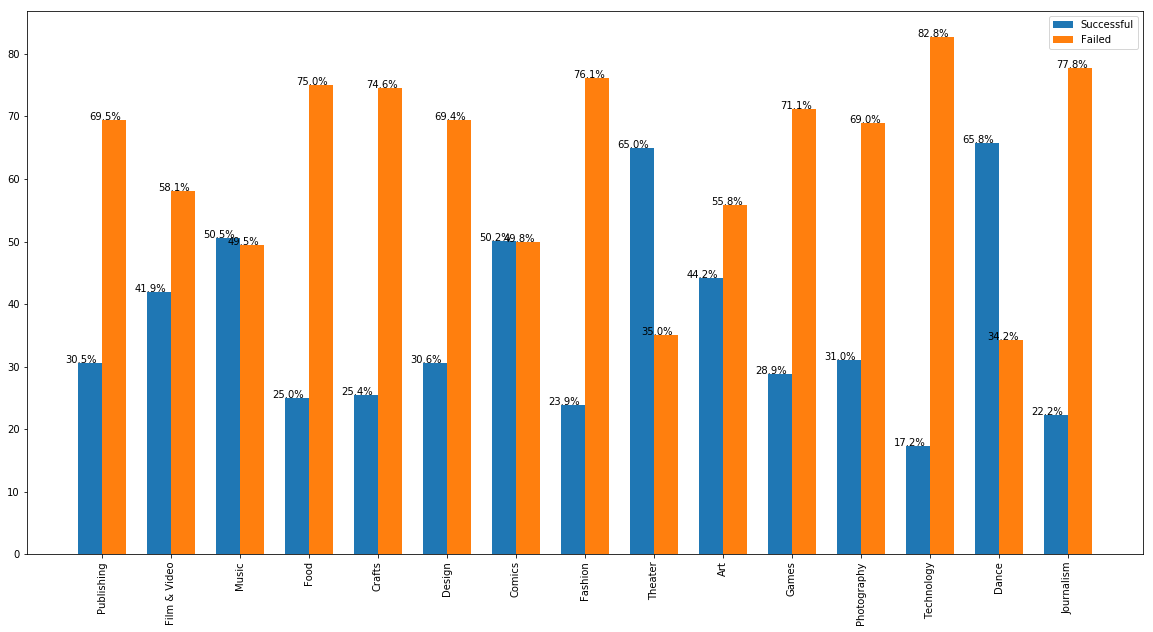


Most successes: Dance at 65.8% success rate
Most failures: Technology at 17.2% success rate


In [28]:
columnwiseSuccessRateAnalysis(df, 'main_category')

Projects belonging to the category `Dance` have the highest success rate whereas projects belonging to `Technology` have the most failures.

### Time frame
Kickstarter was launched in 2009. By plotting over the years the projects were launched, we can find out how much the site has grown over the years.

In [29]:
year_series = df.apply(lambda row : parse_date(row['launched']).year, axis=1)
years = year_series.value_counts().sort_index()

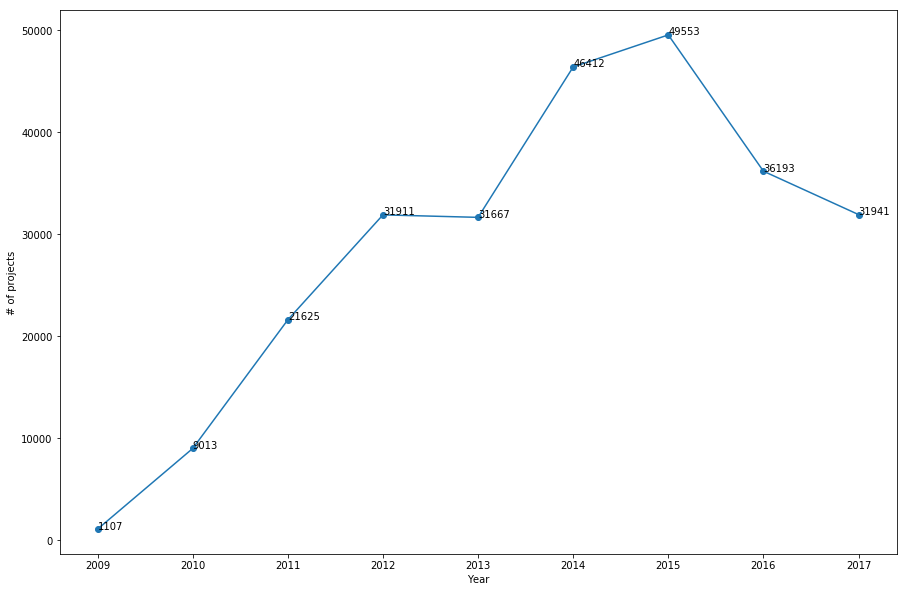

In [30]:
plt.figure(figsize=(15, 10))
plt.plot(years.keys(), years, marker='o')
plt.xlabel('Year')
plt.ylabel('# of projects')
for xy in zip(years.keys(), years):
    plt.annotate('%s' % xy[1], xy=xy, textcoords='data')
plt.show()

The site has grown tremendously over the years with only 1100 projects in 2009 and peaking in 2015 at over 60000 projects.

### Duration
Another key metric is the duration of the project. Projects with goals that are impossible to meet in the set duration are doomed to fail. Unfortunately, our data set does not have this field implicitly. However, it can be calculated using two other fields in our data set, namely <font color=red>__launched__</font> and <font color=red>__deadline__</font>. The difference between the two corresponds to the duration of the project.

In [31]:
# +1 to avoid zero day errors
tmp = df.apply(lambda row : (parse_date(row['deadline']) - parse_date(row['launched'])).days + 1, axis=1)

In [32]:
df = df.join(tmp.rename('duration'))

In [33]:
df.describe()

,ID,goal,pledged,backers,usd pledged,duration
count,2.594220e+05,259422.000000,259422.000000,259422.000000,259422.000000,259422.000000
mean,1.074610e+09,6568.744407,2200.286937,27.375138,1846.399782,33.522843
std,6.190232e+08,7204.333204,4335.285109,35.250108,3792.140857,12.982431
min,1.852000e+04,0.010000,0.000000,0.000000,0.000000,1.000000
25%,5.373703e+08,1500.000000,35.000000,2.000000,20.000000,30.000000
50%,1.075065e+09,4000.000000,515.000000,11.000000,328.000000,30.000000
75%,1.610104e+09,10000.000000,2586.000000,41.000000,2056.000000,35.000000
max,2.147472e+09,34500.000000,292680.000000,152.000000,340423.400000,92.000000


Now that we have our <font color=red>__duration__</font> column, we can see the distribution in the data by means of a histogram and how the distribution varies on failed and successful projects.

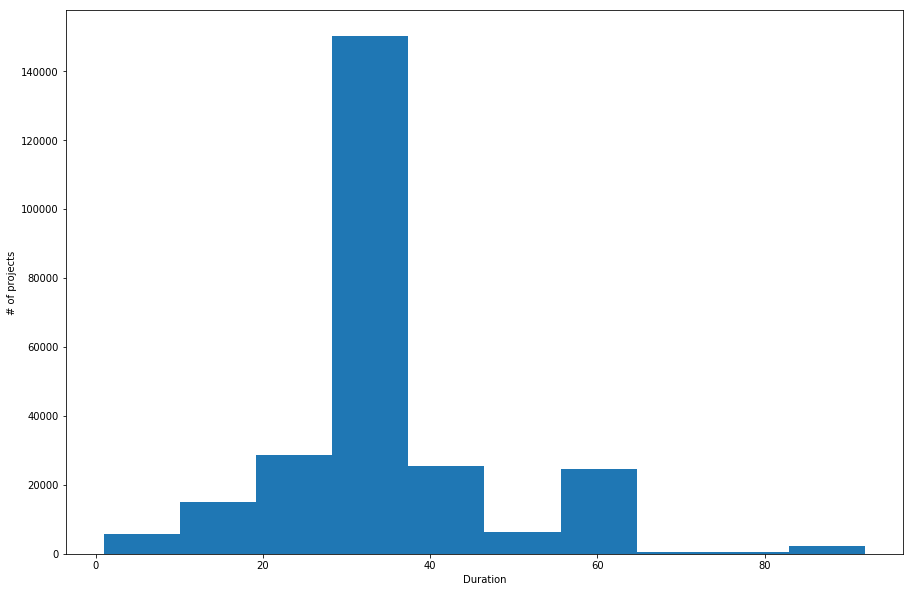

In [34]:
plt.figure(figsize=(15, 10))
plt.hist(df['duration'])
plt.xlabel('Duration')
plt.ylabel('# of projects')
plt.show()

According to this histogram, most projects have a duration between 30 and 40 days.

### Backers
A histogram can be used to see the distribution of backers for a project.

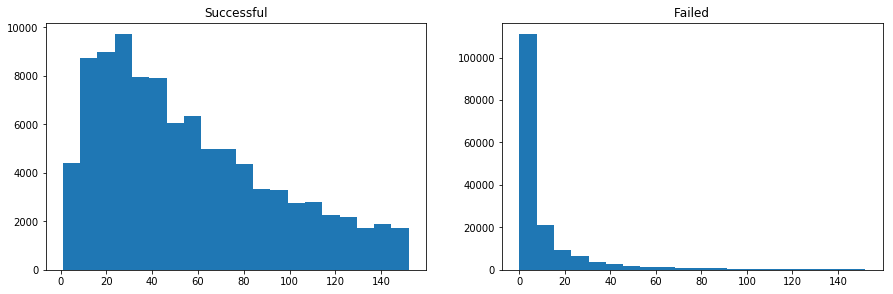

In [35]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(221)
ax1.hist(df.loc[df['state'] == 'successful']['backers'], bins=20)
ax1.set_title('Successful')

ax2 = fig.add_subplot(222)
ax2.hist(df.loc[df['state'] == 'failed']['backers'], bins=20)
ax2.set_title('Failed')

plt.show()

Successful projects have more than 15 backers whereas failed ones mostly die out at around less than 10.

An interesting relation might be the number of backers by the category of the project.

In [36]:
counts = []
for i in df['main_category'].unique():
    counts.append(df.loc[df['main_category'] == i]['backers'].sum())

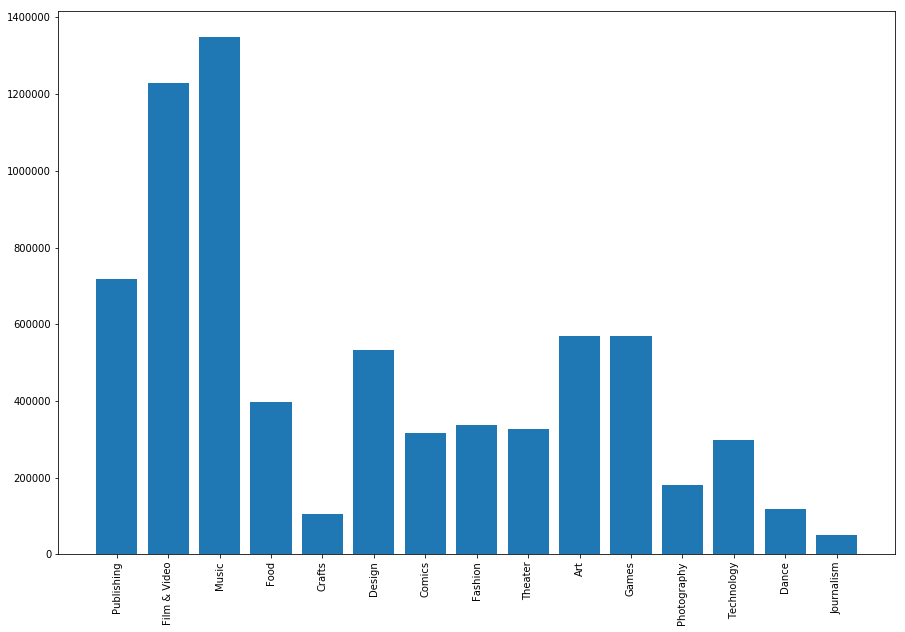

In [37]:
x = np.arange(len(counts))
plt.figure(figsize=(15, 10))
plt.bar(np.arange(len(counts)), counts)
plt.xticks(x, df['main_category'].unique(), rotation='vertical')
plt.show()

Projects belonging to `Music` category have the most backers whereas `Journalism` has the lowest.

Another important metric would be the amount an individual pledges towards the project. We have information regarding the total pledge the project receives and the number of backers it has. Using these two values, we can define a new metric that we'll call average pledge per backer or `apb` for short. This metric tells us how much an individual, on average, pledges towards a project. We can measure this over the <font color=red>__main_category__</font> field.

In [38]:
backers = []
pledged = []
for i in df['main_category'].unique():
    backers.append(df.loc[df['main_category'] == i]['backers'].sum())
    pledged.append(df.loc[df['main_category'] == i]['usd pledged'].sum())

apb = [j / i for i, j in zip(backers, pledged)]

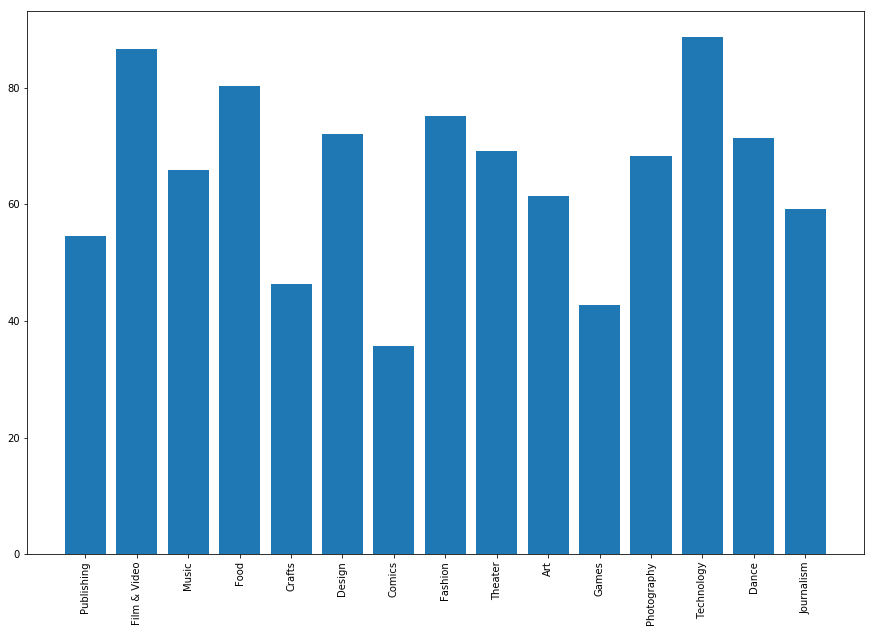

88.79855768747045

In [39]:
x = np.arange(len(counts))
plt.figure(figsize=(15, 10))
plt.bar(np.arange(len(counts)), apb)
plt.xticks(x, df['main_category'].unique(), rotation='vertical')
plt.show()
max(apb)

The `Technology` category has the max value for average pledge per backer at `$88`. This means that, on average, a person pledges `$88` to projects belonging to this category.

## Predicting project status
In this section of the report, we will use various classification methods on different combinations of fields and try to predict the status of a project.

### Choosing data set features
To predict the success of a Kickstarter before it launches, we're restricted to only information that is available at that time. From the fields in the data set, the only ones available during launch are <font color=red>__main_category__</font>, <font color=red>__currency__</font>, <font color=red>__goal__</font>, <font color=red>__country__</font>, and <font color=red>__duration__</font>. Fields that are, intuitively, good predictors such as <font color=red>__backers__</font>, and <font color=red>__usd pledged__</font> are only available once a project has launched and reached traction. As such, these fields can not be used to predict the success of a project at launch. Nevertheless, we will use these as features for the purposes of this report.

We'll try combinations of the above features using three different methods of classification and compare the results on accuracy, which is how much of the total test set was the model able to predict correctly. We'll split the data set into a ratio of 70:30 respectively for the training and test sets. The combinations we'll try are,

- Prior information (available at launch)
 - goal
 - duration
 - main_category
- Later information (available after launch)
 - backers
 - usd pledged

The main_category field consists of text instead of numbers. We need numerical information to train some of the models. One approach would be to simply replace the text with random numbers, however, this introduces an issue. Two classes could be assigned labels 0 and 1 arbitrarily, however, the model might think that this means that the latter class is 'one above' the former class. The approach we'll proceed with is called one-hot label encoding. This introduces new fields in the data set with binary values. The method is better explained through illustration.


The <font color=red>__main_category__</font> field consists of text instead of numbers. We need numerical information to train some of the models. One approach would be to simply replace the text with random numbers, however, this introduces an issue. Two classes could be assigned labels 0 and 1 arbitrarily, however, the model might think that this means that the latter class is 'one above' the former class. The approach we'll proceed with is called one-hot label encoding. This introduces new fields in the data set with binary values. The method is better explained through illustration.

In [40]:
tmp = pd.get_dummies(df, columns=['main_category'])
tmp.head()

,ID,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,1000002330,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1000003930,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,...,0,1,0,0,0,0,0,0,0,0
3,1000007540,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,...,0,0,0,0,0,1,0,0,0,0
6,1000023410,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,...,0,0,1,0,0,0,0,0,0,0
7,1000030581,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.0,failed,40,US,453.0,...,0,0,1,0,0,0,0,0,0,0


The newly introduced fields can be seen in the table above and should help describe how textual information can be converted to numerical information using one-hot label encoding. The newly introduced fields can serve as features for the model to learn on.

In [41]:
# save field names
category_features = ('main_category_' + df['main_category'].unique()).tolist()
df = tmp

Below we define our helper methods to train and test the various classification methods we'll try later in this section.

In [42]:
def getTrainingSet(df, features):
    # 0 to 80% of the data set
    train_set = df[:math.ceil(len(df) * 0.7)]
    # return features and labels
    return train_set[features],  train_set['state'].map({ 'failed': 0, 'successful': 1 })


def getTestSet(df, features):
    # 80% to 100% of the data set
    test_set = df[math.ceil(len(df) * 0.7):]
    return test_set[features], test_set['state'].map({ 'failed': 0, 'successful': 1 })

def trainModel(mdl, x, y):
    mdl.fit(x, y)

def accuracyScore(mdl, x, y):
    y_predicted = mdl.predict(x)
    return accuracy_score(y, y_predicted)
    
def runClassifier(mdl, df, features):
    trainSetX, trainSetY = getTrainingSet(df, features)
    testSetX, testSetY = getTestSet(df, features)
    trainModel(mdl, trainSetX, trainSetY)
    return accuracyScore(mdl, testSetX, testSetY)
    
def tryModel(mdl):
    print('%-50s\tAccuracy' % '[Features]')
    print('%-50s\t%.2f' % ('[goal]', runClassifier(mdl, df, ['goal'])))
    print('%-50s\t%.2f' % ('[duration]', runClassifier(mdl, df, ['duration'])))
    print('%-50s\t%.2f' % ('[main_category]', runClassifier(mdl, df, category_features)))
    print('%-50s\t%.2f' % ('[goal, duration]', runClassifier(mdl, df, ['goal', 'duration'])))
    print('%-50s\t%.2f' % ('[goal, duration, categories]', runClassifier(mdl, df, ['goal', 'duration'] + category_features)))
    print('%-50s\t%.2f' % ('[backers]', runClassifier(mdl, df, ['backers'])))
    print('%-50s\t%.2f' % ('[usd pledged]', runClassifier(mdl, df, ['usd pledged'])))
    print('%-50s\t%.2f' % ('[backers, usd pledged]', runClassifier(mdl, df, ['backers', 'usd pledged'])))
    print('%-50s\t%.2f' % ('[backers, usd pledged, goal]', runClassifier(mdl, df, ['backers', 'usd pledged', 'goal'])))
    print('%-50s\t%.2f' % ('[backers, usd pledged, goal, duration]', runClassifier(mdl, df, ['backers', 'usd pledged', 'goal', 'duration'])))
    print('%-50s\t%.2f' % ('[backers, usd pledged, goal, duration, categories]', runClassifier(mdl, df, ['backers', 'usd pledged', 'goal', 'duration'] + category_features)))

### Method 1: Logistic Regression
Logistic regression is a statistical model that serves as the go-to method for binary classification. It simply models probability of output in terms of input, and can be used for classification by choosing a cutoff value and classifying inputs with probability greater than the cutoff as one class, and the other as below the cutoff. At the heart of the model lies a logistic function, or a squashing function, that maps values between 0 and 1.

In [43]:
tryModel(LogisticRegression())

[Features]                                        	Accuracy
[goal]                                            	0.63
[duration]                                        	0.63
[main_category]                                   	0.65
[goal, duration]                                  	0.63
[goal, duration, categories]                      	0.63
[backers]                                         	0.81
[usd pledged]                                     	0.78
[backers, usd pledged]                            	0.82
[backers, usd pledged, goal]                      	0.94
[backers, usd pledged, goal, duration]            	0.93
[backers, usd pledged, goal, duration, categories]	0.94


### Method 2: Decision Tree
Decision tree learning uses a decision tree to go from observations about an item to conclusions about the item's target value. A decision tree is a flowchart-like structure in which each internal node represents a check on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. By making decisions about the features at each stage, we can determine its label.


In [44]:
tryModel(DecisionTreeClassifier())

[Features]                                        	Accuracy
[goal]                                            	0.64
[duration]                                        	0.64
[main_category]                                   	0.65
[goal, duration]                                  	0.66
[goal, duration, categories]                      	0.67
[backers]                                         	0.84
[usd pledged]                                     	0.78
[backers, usd pledged]                            	0.80
[backers, usd pledged, goal]                      	0.95
[backers, usd pledged, goal, duration]            	0.95
[backers, usd pledged, goal, duration, categories]	0.96


### Method 3: Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [45]:
tryModel(RandomForestClassifier())

[Features]                                        	Accuracy
[goal]                                            	0.64
[duration]                                        	0.64
[main_category]                                   	0.65
[goal, duration]                                  	0.66
[goal, duration, categories]                      	0.67
[backers]                                         	0.84
[usd pledged]                                     	0.78
[backers, usd pledged]                            	0.80
[backers, usd pledged, goal]                      	0.96
[backers, usd pledged, goal, duration]            	0.96
[backers, usd pledged, goal, duration, categories]	0.97


### Discussion
The models give up to 65% accuracy using prior information. However, once equipped with later information, the models can predict the class labels with more than 90% accuracy.